In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Preparation SNMP File

## Load Data

In [ ]:
curdir = Path.cwd()
curdir = curdir.parent
csv_path = curdir / "data"/ "real_data" / "vdc2" / "snmp.csv"
df_snmp = pd.read_csv(csv_path)
df_snmp.head()

,name,time,agent_host,host,hostname,loadAverage1,loadAverage15,loadAverage5,memAvailReal,memAvailSwap,...,snmp_type,ssCpuIdle,ssCpuRawIdle,ssCpuRawSystem,ssCpuRawUser,ssCpuRawWait,ssCpuSystem,ssCpuUser,uptime,vdc_no
0,snmp,1.727740e+18,192.168.100.242,hostname2,hostname2,0.024902,0.0,0.010254,11189108,2097148,...,Linux,99.0,3952067271,1620002,2764254,101717,0.0,0.0,395963917,vdc2
1,snmp,1.727740e+18,192.168.100.242,hostname2,hostname2,0.013672,0.0,0.007324,11236092,2097148,...,Linux,99.0,3952097209,1620019,2764270,101719,0.0,0.0,395966917,vdc2
2,snmp,1.727740e+18,192.168.100.242,hostname2,hostname2,0.006836,0.0,0.004395,11236092,2097148,...,Linux,99.0,3952127177,1620025,2764276,101720,0.0,0.0,395969917,vdc2
3,snmp,1.727740e+18,192.168.100.242,hostname2,hostname2,0.003418,0.0,0.001465,11234328,2097148,...,Linux,99.0,3952157102,1620038,2764312,101722,0.0,0.0,395972916,vdc2
4,snmp,1.727740e+18,192.168.100.242,hostname2,hostname2,0.000488,0.0,0.000000,11234328,2097148,...,Linux,99.0,3952187070,1620041,2764317,101722,0.0,0.0,395975916,vdc2


In [ ]:
df_snmp.shape

(1048575, 26)

## Convert time

In [17]:
df['timestamp_converted'] = pd.to_datetime(df['time'], unit='ns') + pd.Timedelta(hours=7)
df[['time','timestamp_converted']].head()

,time,timestamp_converted
0,1.727740e+18,2024-10-01 06:46:40
1,1.727740e+18,2024-10-01 06:46:40
2,1.727740e+18,2024-10-01 06:46:40
3,1.727740e+18,2024-10-01 06:46:40
4,1.727740e+18,2024-10-01 06:46:40


In [18]:
df.columns

Index(['name', 'time', 'agent_host', 'host', 'hostname', 'loadAverage1',
       'loadAverage15', 'loadAverage5', 'memAvailReal', 'memAvailSwap',
       'memBuffer', 'memCached', 'memShared', 'memTotalFree', 'memTotalReal',
       'memTotalSwap', 'snmp_type', 'ssCpuIdle', 'ssCpuRawIdle',
       'ssCpuRawSystem', 'ssCpuRawUser', 'ssCpuRawWait', 'ssCpuSystem',
       'ssCpuUser', 'uptime', 'vdc_no', 'timestamp_converted'],
      dtype='object')

## Generate timestamps at 30-second intervals

In [ ]:
groups = df_snmp.groupby('timestamp_converted')
df_snmp['offset'] = groups.cumcount(ascending=False)
df_snmp[['timestamp_converted','offset']]

,timestamp_converted,offset
0,2024-10-01 06:46:40,139
1,2024-10-01 06:46:40,138
2,2024-10-01 06:46:40,137
3,2024-10-01 06:46:40,136
4,2024-10-01 06:46:40,135
...,...,...
1048570,2025-09-30 09:40:00,4
1048571,2025-09-30 09:40:00,3
1048572,2025-09-30 09:40:00,2
1048573,2025-09-30 09:40:00,1


In [ ]:
df_snmp['timestamp_fixed'] = df_snmp['timestamp_converted'] - pd.to_timedelta(df_snmp['offset'] * 30, unit='s')
df_snmp[['timestamp_converted','offset','timestamp_fixed']]

,timestamp_converted,offset,timestamp_fixed
0,2024-10-01 06:46:40,139,2024-10-01 05:37:10
1,2024-10-01 06:46:40,138,2024-10-01 05:37:40
2,2024-10-01 06:46:40,137,2024-10-01 05:38:10
3,2024-10-01 06:46:40,136,2024-10-01 05:38:40
4,2024-10-01 06:46:40,135,2024-10-01 05:39:10
...,...,...,...
1048570,2025-09-30 09:40:00,4,2025-09-30 09:38:00
1048571,2025-09-30 09:40:00,3,2025-09-30 09:38:30
1048572,2025-09-30 09:40:00,2,2025-09-30 09:39:00
1048573,2025-09-30 09:40:00,1,2025-09-30 09:39:30


In [ ]:
df_snmp[['timestamp_converted','offset','timestamp_fixed']][135:145]

,timestamp_converted,offset,timestamp_fixed
135,2024-10-01 06:46:40,4,2024-10-01 06:44:40
136,2024-10-01 06:46:40,3,2024-10-01 06:45:10
137,2024-10-01 06:46:40,2,2024-10-01 06:45:40
138,2024-10-01 06:46:40,1,2024-10-01 06:46:10
139,2024-10-01 06:46:40,0,2024-10-01 06:46:40
140,2024-10-01 09:33:20,333,2024-10-01 06:46:50
141,2024-10-01 09:33:20,332,2024-10-01 06:47:20
142,2024-10-01 09:33:20,331,2024-10-01 06:47:50
143,2024-10-01 09:33:20,330,2024-10-01 06:48:20
144,2024-10-01 09:33:20,329,2024-10-01 06:48:50


In [ ]:
df_snmp[['timestamp_converted','offset','timestamp_fixed']][470:478]

,timestamp_converted,offset,timestamp_fixed
470,2024-10-01 09:33:20,3,2024-10-01 09:31:50
471,2024-10-01 09:33:20,2,2024-10-01 09:32:20
472,2024-10-01 09:33:20,1,2024-10-01 09:32:50
473,2024-10-01 09:33:20,0,2024-10-01 09:33:20
474,2024-10-01 12:20:00,332,2024-10-01 09:34:00
475,2024-10-01 12:20:00,331,2024-10-01 09:34:30
476,2024-10-01 12:20:00,330,2024-10-01 09:35:00
477,2024-10-01 12:20:00,329,2024-10-01 09:35:30


In [ ]:
df_snmp[['timestamp_converted','offset','timestamp_fixed']][1048570:1048575]

,timestamp_converted,offset,timestamp_fixed
1048570,2025-09-30 09:40:00,4,2025-09-30 09:38:00
1048571,2025-09-30 09:40:00,3,2025-09-30 09:38:30
1048572,2025-09-30 09:40:00,2,2025-09-30 09:39:00
1048573,2025-09-30 09:40:00,1,2025-09-30 09:39:30
1048574,2025-09-30 09:40:00,0,2025-09-30 09:40:00


In [24]:
expected = pd.date_range(
    start='2024-10-01 05:37:10',
    end='2025-09-30 09:40:00',
    freq='29.94s'
)

In [ ]:
print("Actual count:", df_snmp['timestamp_fixed'].nunique())
print("Expected count:", len(expected))


Actual count: 1048575
Expected count: 1050908


In [ ]:
df_snmp['time_diff'] = df_snmp['timestamp_fixed'].diff()

missing_gaps = df_snmp[df_snmp['time_diff'] > pd.Timedelta(seconds=30)]

print(f"num of Missing time range {len(missing_gaps)} ช่วง\n")

for i, row in missing_gaps.head(5).iterrows():
    prev_time = df_snmp.loc[i - 1, 'timestamp_fixed']
    this_time = row['timestamp_fixed']
    print(f"Missing Range: {prev_time} → {this_time}  ({(this_time - prev_time)})")


num of Missing time range 2098 ช่วง

Missing Range: 2024-10-01 09:33:20 → 2024-10-01 09:34:00  (0 days 00:00:40)
Missing Range: 2024-10-01 12:20:00 → 2024-10-01 12:20:40  (0 days 00:00:40)
Missing Range: 2024-10-01 17:53:20 → 2024-10-01 17:54:00  (0 days 00:00:40)
Missing Range: 2024-10-01 20:40:00 → 2024-10-01 20:40:40  (0 days 00:00:40)
Missing Range: 2024-10-02 02:13:20 → 2024-10-02 02:14:00  (0 days 00:00:40)


In [ ]:
df_snmp['time_diff'] = df_snmp['timestamp_fixed'].diff()

missing_gaps = df_snmp[df_snmp['time_diff'] < pd.Timedelta(seconds=30)]

print(f"num of Missing time range {len(missing_gaps)} ช่วง\n")

for i, row in missing_gaps.head(5).iterrows():
    prev_time = df_snmp.loc[i - 1, 'timestamp_fixed']
    this_time = row['timestamp_fixed']
    print(f"Missing Range: {prev_time} → {this_time}  ({(this_time - prev_time)})")


num of Missing time range 1048 ช่วง

Missing Range: 2024-10-01 06:46:40 → 2024-10-01 06:46:50  (0 days 00:00:10)
Missing Range: 2024-10-01 15:06:40 → 2024-10-01 15:06:50  (0 days 00:00:10)
Missing Range: 2024-10-01 23:26:40 → 2024-10-01 23:26:50  (0 days 00:00:10)
Missing Range: 2024-10-02 07:46:40 → 2024-10-02 07:46:50  (0 days 00:00:10)
Missing Range: 2024-10-02 16:06:40 → 2024-10-02 16:06:50  (0 days 00:00:10)


In [ ]:
df_agg_hour = df_snmp.copy()

# สร้าง date และ hour
df_agg_hour['date'] = df_agg_hour['timestamp_fixed'].dt.date
df_agg_hour['hour'] = df_agg_hour['timestamp_fixed'].dt.hour

# กำหนดคอลัมน์ที่ AVG และ SUM
avg_cols = [
    'loadAverage1', 'loadAverage5', 'loadAverage15',
    'memAvailReal', 'memAvailSwap', 'memBuffer', 'memCached', 'memShared', 'memTotalFree',
    'memTotalReal', 'memTotalSwap',
    'ssCpuIdle', 'ssCpuSystem', 'ssCpuUser'
]

sum_cols = [
    'ssCpuRawIdle', 'ssCpuRawSystem', 'ssCpuRawUser', 'ssCpuRawWait'
]

# Uptime ใช้ MAX
max_cols = ['uptime']

# กำหนด aggregation dictionary
agg_dict = {col: 'mean' for col in avg_cols}
agg_dict.update({col: 'sum' for col in sum_cols})
agg_dict.update({col: 'max' for col in max_cols})

# group by เวลาและ host / vdc / snmp_type
df_hourly = (
    df_agg_hour
    .groupby(['date', 'hour', 'name', 'agent_host', 'host', 'hostname', 'snmp_type', 'vdc_no'])
    .agg(agg_dict)
    .reset_index()
)

df_hourly.head()


,date,hour,name,agent_host,host,hostname,snmp_type,vdc_no,loadAverage1,loadAverage5,...,memTotalReal,memTotalSwap,ssCpuIdle,ssCpuSystem,ssCpuUser,ssCpuRawIdle,ssCpuRawSystem,ssCpuRawUser,ssCpuRawWait,uptime
0,2024-10-01,5,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.004034,0.001529,...,16336224.0,2097148.0,99.000000,0.0,0.000000,181826101821,74528635,127169158,4679509,396098917
1,2024-10-01,6,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.011029,0.003910,...,16336224.0,2097148.0,99.000000,0.0,0.000000,478584295260,196140500,334673395,12317132,396461920
2,2024-10-01,7,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.003101,0.001099,...,16336224.0,2097148.0,99.000000,0.0,0.000000,475061625371,194666226,332140702,12228335,396821922
3,2024-10-01,8,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.005473,0.002738,...,16336224.0,2097148.0,99.000000,0.0,0.000000,475493093615,194765665,332299568,12234263,397181926
4,2024-10-01,9,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.022038,0.014792,...,16336224.0,2097148.0,98.957983,0.0,0.016807,471956607216,193265228,329745301,12140058,397538930


In [29]:
df_hourly

,date,hour,name,agent_host,host,hostname,snmp_type,vdc_no,loadAverage1,loadAverage5,...,memTotalReal,memTotalSwap,ssCpuIdle,ssCpuSystem,ssCpuUser,ssCpuRawIdle,ssCpuRawSystem,ssCpuRawUser,ssCpuRawWait,uptime
0,2024-10-01,5,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.004034,0.001529,...,16336224.0,2097148.0,99.000000,0.0,0.000000,181826101821,74528635,127169158,4679509,396098917
1,2024-10-01,6,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.011029,0.003910,...,16336224.0,2097148.0,99.000000,0.0,0.000000,478584295260,196140500,334673395,12317132,396461920
2,2024-10-01,7,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.003101,0.001099,...,16336224.0,2097148.0,99.000000,0.0,0.000000,475061625371,194666226,332140702,12228335,396821922
3,2024-10-01,8,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.005473,0.002738,...,16336224.0,2097148.0,99.000000,0.0,0.000000,475493093615,194765665,332299568,12234263,397181926
4,2024-10-01,9,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.022038,0.014792,...,16336224.0,2097148.0,98.957983,0.0,0.016807,471956607216,193265228,329745301,12140058,397538930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,2025-09-30,4,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.011057,0.004859,...,16336180.0,2097148.0,99.000000,0.0,0.000000,295779136678,1600155607,6060535539,33691702,963398803
8736,2025-09-30,5,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.019751,0.014441,...,16336180.0,2097148.0,99.000000,0.0,0.000000,294027964865,1587172170,6010779802,33424811,963758805
8737,2025-09-30,6,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.023264,0.013170,...,16336180.0,2097148.0,99.000000,0.0,0.000000,262757040740,1415481459,5359987067,29818779,964079809
8738,2025-09-30,8,snmp,192.168.100.242,hostname2,hostname2,Linux,vdc2,0.015249,0.010264,...,16336180.0,2097148.0,99.000000,0.0,0.000000,118050583165,635067589,2404605595,13381883,964223809


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_hourly(df, value_col, date_col='date', hour_col='hour', figsize=(15,5)):
    """
    Plot hourly time series.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame ที่มีคอลัมน์ date และ hour
    value_col : str
        ชื่อคอลัมน์ที่ต้องการ plot
    date_col : str
        ชื่อคอลัมน์วันที่ (default 'date')
    hour_col : str
        ชื่อคอลัมน์ชั่วโมง (default 'hour')
    figsize : tuple
        ขนาดรูป (default (15,5))
    """
    # สร้าง timestamp จาก date + hour
    df = df.copy()
    df['timestamp'] = pd.to_datetime(df[date_col].astype(str) + ' ' + df[hour_col].astype(str) + ':00:00')
    
    # Plot
    plt.figure(figsize=figsize)
    plt.plot(df['timestamp'], df[value_col])
    plt.title(f'Hourly {value_col}')
    plt.xlabel('Time')
    plt.ylabel(value_col)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


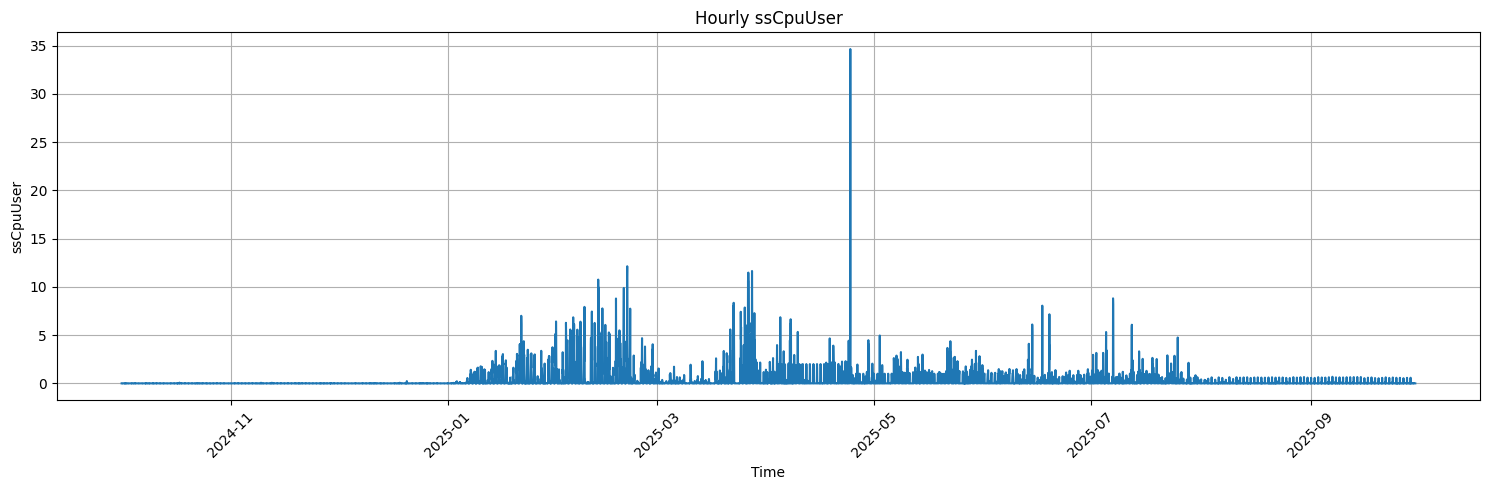

In [31]:
plot_hourly(df_hourly, 'ssCpuUser')
# plot_hourly(df_hourly, 'ssCpuSystem')

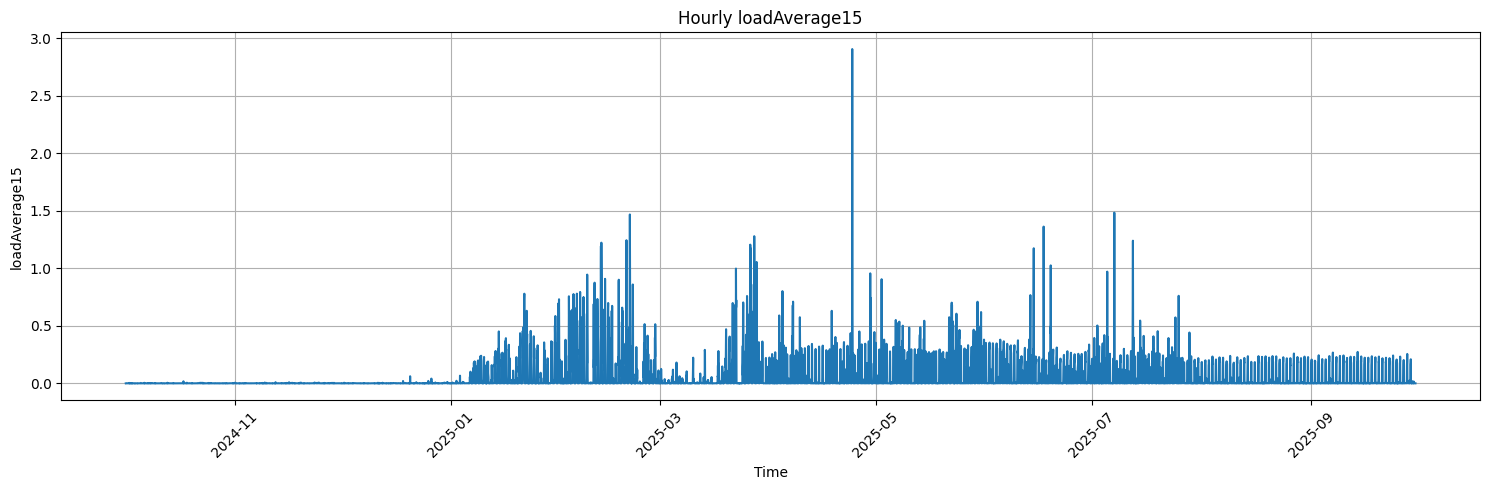

In [32]:
plot_hourly(df_hourly, 'loadAverage15')

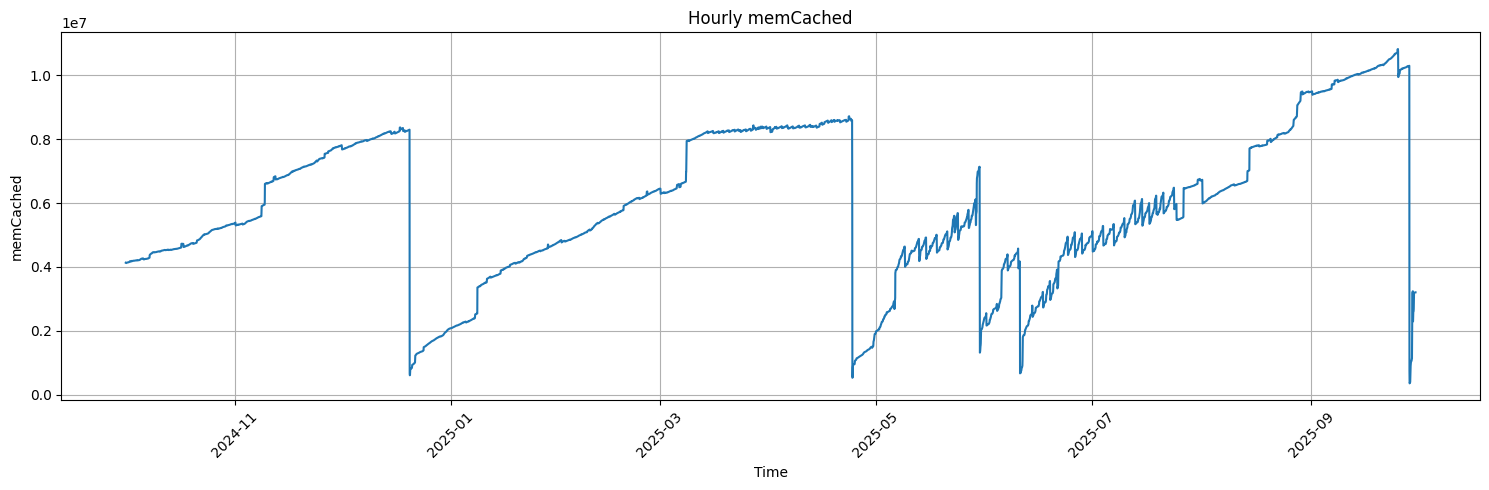

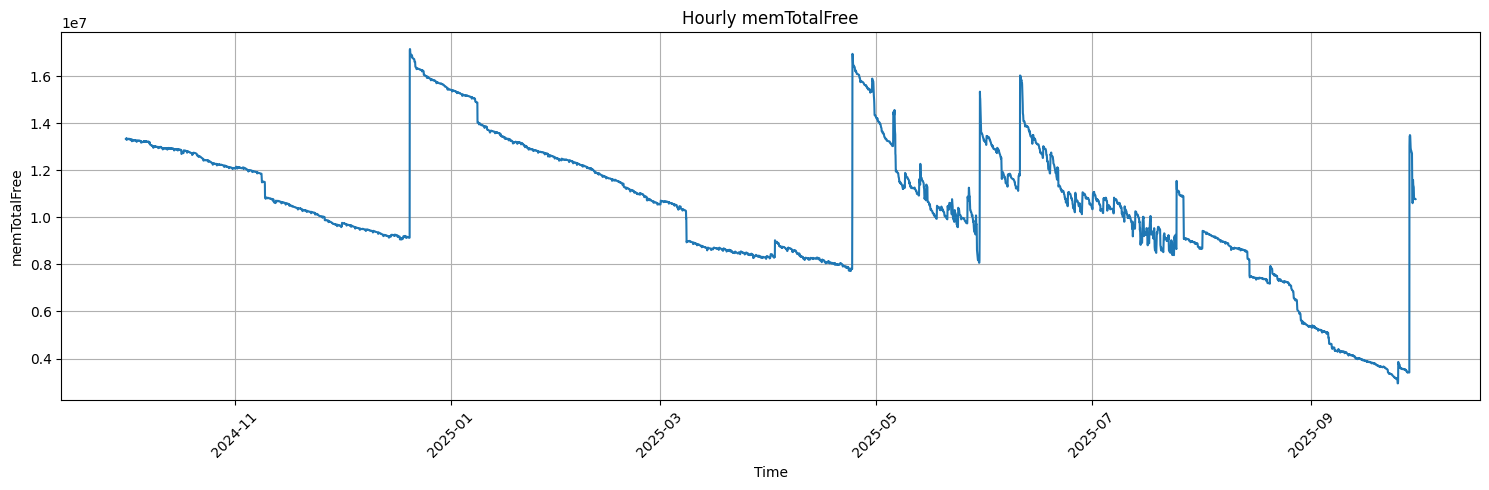

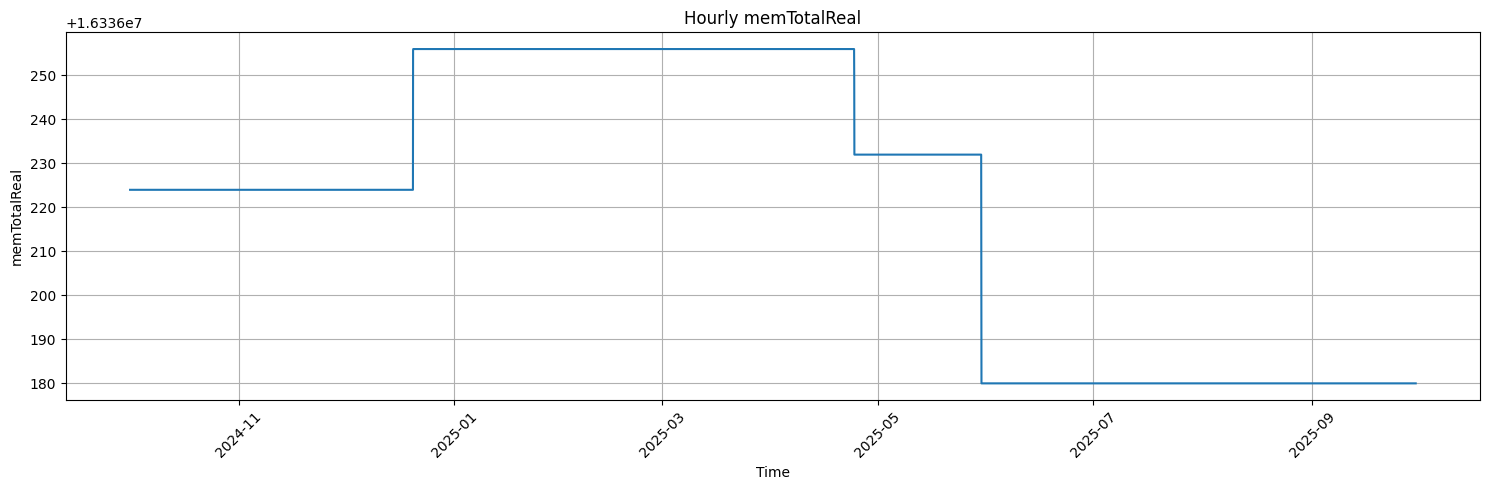

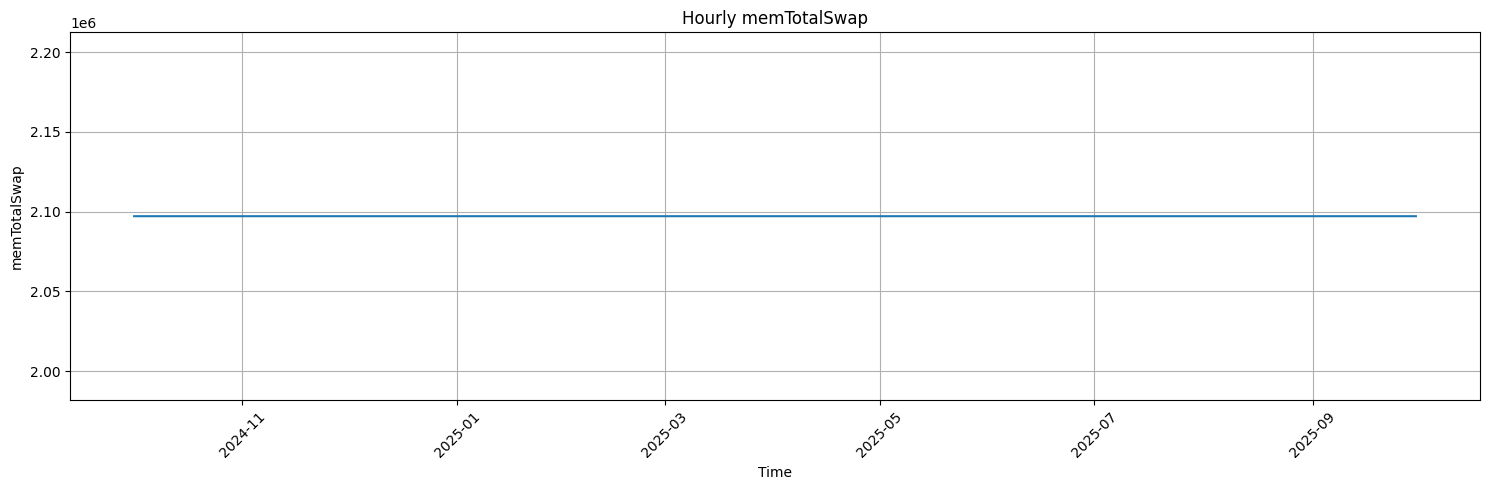

In [33]:
plot_hourly(df_hourly, 'memCached')
# plot_hourly(df_hourly, 'memShared')
plot_hourly(df_hourly, 'memTotalFree')
plot_hourly(df_hourly, 'memTotalReal')
plot_hourly(df_hourly, 'memTotalSwap')


---

# Preparation Storage File